# Tesis


In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg

import cv2
from keras.utils.vis_utils import plot_model

from google.colab.patches import cv2_imshow



import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate


from sklearn.model_selection import GridSearchCV



from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, KernelPCA

from sklearn.neural_network import MLPRegressor
import pickle
from seaborn import regplot

# Descripcion

Como se va a usar una ANN por series de tiempo, la cual tiene las siguientes entradas y salidas:

Entradas:  X=[TDS[6],Tmp[6],Lum[1],Hora,CL,CO,CC,CA]
*   Lum: Luminosidad[n]
*   TDS:Solidos disueltos totales[n-1:n-6]
*   Temp:TEMPERATURA[n-1:n-56]
*   Hora: Hora del dia
*   CL: ciclo de trabajo en luminosidad a aplicar
*   CO: ciclo de trabajo en oxigeno a aplicar
*   CC: ciclo de trabajo en circulacion
*   CA: ciclo de trabajo en aireacion

SALIDAS  [TDS_p,Tmp_p]:
*   TDS_p:TDS siguiente
*   Temp_p:TEMPERATURA siguiente






**Entrenamiento**

Se hara una evaluacion con el 5% de los datos y el 95% restante se usara para entrenar el modelo usando 5 pliegues con Cross Validation.

# Desarrollo

## Limpieza

Respecto a la limpiza, esta se hizo en otro notebook aparte

## Evaluacion

En primer lugar se carga el dataset obtenido

In [ ]:

datos=pd.read_excel("/content/drive/MyDrive/Proyecto grado Privado Luis/data_set2_completoControlModerno.xlsx") 
datos=datos.iloc[0:864]
print(len(datos))
dfX=datos[['TDS_n1','TDS_n2','TDS_n3','TDS_n4','TDS_n5','TDS_n6',
                 'Temp_n1','Temp_n2','Temp_n3','Temp_n4','Temp_n5','Temp_n6',
                 'Hora','CL','CC','CO','CA']]
dfY=datos[['TDS','Temp']]

dfX.head(5)


864


,TDS_n1,TDS_n2,TDS_n3,TDS_n4,TDS_n5,TDS_n6,Temp_n1,Temp_n2,Temp_n3,Temp_n4,Temp_n5,Temp_n6,Hora,CL,CC,CO,CA
0,101.836533,100.968712,101.760529,102.658501,97.404671,97.959190,23.0000,22.0000,22.5625,23.0625,22.5000,22.8750,12.0,0.0,0.99,0.99,0.99
1,102.294701,101.836533,100.968712,101.760529,102.658501,97.404671,23.8750,23.0000,22.0000,22.5625,23.0625,22.5000,14.0,0.0,0.99,0.99,0.00
2,106.808273,102.294701,101.836533,100.968712,101.760529,102.658501,23.9375,23.8750,23.0000,22.0000,22.5625,23.0625,16.0,0.0,0.99,0.99,0.00
3,107.972763,106.808273,102.294701,101.836533,100.968712,101.760529,23.3750,23.9375,23.8750,23.0000,22.0000,22.5625,18.0,0.0,0.99,0.99,0.00
4,111.637520,107.972763,106.808273,102.294701,101.836533,100.968712,22.6875,23.3750,23.9375,23.8750,23.0000,22.0000,22.0,0.0,0.99,0.99,0.00


In [ ]:
dfY.head(5)

,TDS,Temp
400,300.239441,21.0625
401,313.513458,21.8750
402,307.123230,22.5000
403,312.101318,23.1875
404,316.269073,23.3750


In [ ]:
dfXTrain,dfX_Evaluation,dfYTrain,dfY_Evaluation = train_test_split(dfX,dfY,test_size=0.15)



## Normalizacion

In [ ]:
Data=np.array(dfXTrain.values)
scaler = StandardScaler()
scaler.fit(Data)
MeanTrain=scaler.mean_
VarTrain=scaler.var_
dfXTrainNorm=scaler.transform(Data)

print(MeanTrain,VarTrain)

[2.86883501e+02 2.86323063e+02 2.85911469e+02 2.85247393e+02
 2.84808358e+02 2.84425061e+02 2.18210150e+01 2.18202486e+01
 2.18142030e+01 2.18044959e+01 2.18091792e+01 2.18067950e+01
 1.07275204e+01 3.47091198e-01 8.88801090e-01 8.89550409e-01
 2.80490463e-01] [1.26923362e+04 1.26692752e+04 1.26202777e+04 1.26169941e+04
 1.26267882e+04 1.26518220e+04 1.40454900e+00 1.38150182e+00
 1.39099463e+00 1.38678241e+00 1.43336453e+00 1.47558798e+00
 4.67677167e+01 2.15559936e-01 6.50026498e-02 4.83999341e-02
 1.91220468e-01]


## Analisis de dimensionalidad

In [ ]:
pca = decomposition.PCA(n_components=17)

#The optional parameter whiten=True makes it possible to project the data onto the singular space while scaling each component to unit variance.
pca.fit(dfXTrainNorm)
#X = pca.transform(X)
vars=pca.explained_variance_ratio_
print("Pesos de PCA:",vars*100/sum(vars))
print("porcentaje de PCA:",sum(vars[0:11]*100))

Pesos de PCA: [4.27237582e+01 1.92267253e+01 1.28081967e+01 8.85017248e+00
 5.35114198e+00 4.39169908e+00 2.58648028e+00 2.12378708e+00
 1.26500448e+00 3.10004106e-01 1.67100786e-01 9.06116164e-02
 5.88113741e-02 1.81876996e-02 1.13776962e-02 9.10930405e-03
 7.83190554e-03]
porcentaje de PCA: 99.80407040413604


A continuacion se seleccionan 11 componentes principales

In [ ]:
pca = decomposition.PCA(n_components=11)
pca.fit(dfXTrainNorm)

EigenValues=pca.explained_variance_ratio_
EigenVectors=np.transpose(np.array(pca.components_))

dfXTrainNorm6Dim = pca.transform(dfXTrainNorm)

## Creacion y entrenamiento del modelo (con grid search)

In [ ]:
from sklearn.neural_network import MLPRegressor
verbose=False
#Se define el MLP base
clf = MLPRegressor(random_state=1 ,verbose=verbose,solver='lbfgs',activation='identity',max_iter=10000)
#------Primera version de hiper parametros-----
#parameters = {'activation':('identity', 'logistic', 'relu', 'softmax', 'tanh'),
#'hidden_layer_sizes': [(30,50,30),(20,20,20),(30,30,30),(10,10,10,10),(20,20,20,20),(30,30,30,30),(10,10,10,10,10)]},'alpha':[0.0001,0.0005,0.0010]
#------Segunda version de hiper parametros-----
parameters = {'hidden_layer_sizes': [(20,20),(5,5,5),(20,20,20),(30,30,30),(20,20,20,20),(30,30,30,30),(50,50,50,50)],'alpha':[0.00001,0.0001]}

clf_grid = GridSearchCV(clf, parameters)
clf_grid.fit(dfXTrainNorm6Dim, dfYTrain);

In [ ]:
data=clf_grid.cv_results_
dfit = pd.DataFrame(data)

Se genera tabla de ranking

In [ ]:

rank=dfit.loc[(dfit['rank_test_score']<=40),['rank_test_score','param_hidden_layer_sizes','mean_fit_time', 'mean_score_time', 'mean_test_score','std_test_score','std_score_time','params']]
dfit.loc[(dfit['rank_test_score']<=40),['rank_test_score','param_hidden_layer_sizes','mean_fit_time', 'mean_score_time', 'mean_test_score','std_test_score','std_score_time','params']]

,rank_test_score,param_hidden_layer_sizes,mean_fit_time,mean_score_time,mean_test_score,std_test_score,std_score_time,params
0,13,"(20, 20)",0.905342,0.002072,0.928428,0.021185,0.000035,"{'alpha': 1e-05, 'hidden_layer_sizes': (20, 20)}"
1,2,"(5, 5, 5)",0.868753,0.002127,0.930480,0.018468,0.000158,"{'alpha': 1e-05, 'hidden_layer_sizes': (5, 5, 5)}"
2,10,"(20, 20, 20)",1.011473,0.002300,0.929236,0.021661,0.000405,"{'alpha': 1e-05, 'hidden_layer_sizes': (20, 20..."
3,1,"(30, 30, 30)",3.119658,0.002889,0.930628,0.018906,0.000134,"{'alpha': 1e-05, 'hidden_layer_sizes': (30, 30..."
4,12,"(20, 20, 20, 20)",1.822055,0.002217,0.928492,0.019413,0.000064,"{'alpha': 1e-05, 'hidden_layer_sizes': (20, 20..."
5,4,"(30, 30, 30, 30)",4.259677,0.002870,0.930188,0.019532,0.000050,"{'alpha': 1e-05, 'hidden_layer_sizes': (30, 30..."
6,5,"(50, 50, 50, 50)",4.458385,0.003029,0.930078,0.020148,0.000044,"{'alpha': 1e-05, 'hidden_layer_sizes': (50, 50..."
7,7,"(20, 20)",0.939086,0.002247,0.929857,0.018977,0.000378,"{'alpha': 0.0001, 'hidden_layer_sizes': (20, 20)}"
8,9,"(5, 5, 5)",0.837276,0.002150,0.929823,0.017940,0.000063,"{'alpha': 0.0001, 'hidden_layer_sizes': (5, 5,..."
9,3,"(20, 20, 20)",1.126501,0.002138,0.930206,0.019118,0.000068,"{'alpha': 0.0001, 'hidden_layer_sizes': (20, 2..."


Se escoje una

In [ ]:
print(rank.loc[ 0,'params'])

{'alpha': 1e-05, 'hidden_layer_sizes': (20, 20)}


re entrenamiento

In [ ]:
Parametros=rank.loc[ 1,'params']
print(Parametros)
clf = MLPRegressor(**Parametros,random_state=1 ,verbose=verbose,solver='lbfgs',activation='identity',max_iter=10000)
clf.fit(dfXTrainNorm6Dim, dfYTrain)
clf.score(dfXTrainNorm6Dim, dfYTrain)

{'alpha': 1e-05, 'hidden_layer_sizes': (5, 5, 5)}


0.9354028257239926

## Evaluacion

Se calcula el R2 y se grafica el conjunto de validacion en grafica de linea

R2= 0.9426555290445702
(130,)
(130,)


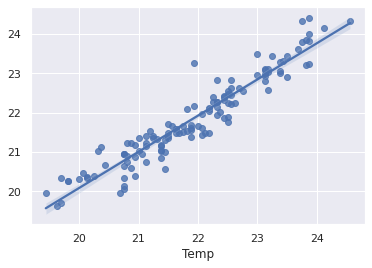

In [ ]:

sb.set_theme(color_codes=True)
#https://seaborn.pydata.org/generated/seaborn.regplot.html


Data2=np.array(dfX_Evaluation.values)


dfX_Evaluation_Norm=scaler.transform(Data2)
DfX_Evaluation_Norm2Dim = pca.transform(dfX_Evaluation_Norm)


y_pred_test_nn =clf.predict(DfX_Evaluation_Norm2Dim)
R2=clf.score(DfX_Evaluation_Norm2Dim, dfY_Evaluation)

print("R2=",R2)

print(y_pred_test_nn[:,0].shape)
print(dfY_Evaluation.iloc[:,1].shape)

ax = regplot(x=dfY_Evaluation.iloc[:,1] ,y=y_pred_test_nn[:,1], color="b")

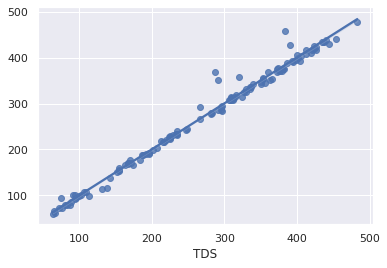

In [ ]:
ax = regplot(x=dfY_Evaluation.iloc[:,0] ,y=y_pred_test_nn[:,0], color="b")

In [ ]:
print(r2_score(dfY_Evaluation.iloc[:,0], y_pred_test_nn[:,0]))
print(r2_score(dfY_Evaluation.iloc[:,1], y_pred_test_nn[:,1]))

0.985966133901768
0.8993449241873724


Resumen:

R2 de TDS=0.985966133901768

R2 de TDS=0.8993449241873724

# Download models and use

In [ ]:
from joblib import dump, load
import pickle
dump(pca, 'dim_sacaler_17to10.bin', compress=True)
dump(scaler, 'std_scaler.bin', compress=True)
filename = 'RNmodel.sav'
pickle.dump(clf, open(filename, 'wb'))
